# Lecture 5: Hands-on

## Outline:

- ### Law of Large Numbers
- ### Central Limit Theorem
- ### Confidence Interval
- ### Hypothesis Testing

Reference: ECE 225, Alon Orlitsky, UCSD

In [38]:
%pylab inline
import ipywidgets as widgets
import matplotlib.pyplot as plt 
from math import sqrt,exp

Populating the interactive namespace from numpy and matplotlib


C:\Users\iocak\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['exp', 'sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [28]:
plt.style.use([{
    "figure.figsize":(12,9),
    "xtick.labelsize": "large",
    "ytick.labelsize": "large",
    "legend.fontsize": "x-large",
    "axes.labelsize": "x-large",
    "axes.titlesize": "xx-large",
    "axes.spines.top": False,
    "axes.spines.right": False,
},'seaborn-poster'])

## Law of Large Numbers

We demonstrate the Law of Large Numbers by plotting the distribution of sample means.

The following code calculates and plots the probability distribution  function (PDF) of the sample mean
$$\overline{X}_n=\frac{1}{n}\sum_{i=1}^n X_i.$$

### Uniform distributions

The $X_i$ follow an i.i.d. uniform distribution on interval $[a,b]$
$$f_{X_i}(x)=\begin{cases}
\frac{1}{b-a} & a\le x\le b\\
0 & \text{otherwise}
\end{cases}$$

We generate sliders to control the input to the function, followed by the actual simulation. 

$[a,b]$ is the range of the uniform distirbution, shown in blue, and its mean $x=\mu=E[X_i]$
is shown in green. $n$ is the number of variables that get averaged and the pdf of the average is shown in blue. For example, if $n=5$ and $s=1000$ then you generate 1000 samples, where each sample is the mean of 5 samples from the uniform distribution. 

Observe that as you increase $n$, the distribution of the mean approaches a spike at $\mu$. And when you increase $s$ the simulation histogram approaches the actual distribution. 

In [45]:
# defining interactive widget object
w=widgets.FloatRangeSlider(description = "[a, b]", 
                           value=[2, 8], 
                           min=0.02,
                           max=9.98,
                           step=0.01,
                           continuous_update = False)


# Generate samples of emphirical mean of k uniform distribution on [a,b]
def generate_uniform_counts(a, b, sample_size, number_samples):
    X= random.uniform(a,b,[sample_size, number_samples])  # generate a sample_size by number_samples matrix of uniform random numbers
    S=sum(X,axis=0)/sample_size
    return S

def uniform_plot_hist(s, sample_size, number_samples):
    a, b = s
    if number_samples > 0:
        n = number_samples
        counts = generate_uniform_counts(a, b, sample_size, number_samples)
        hist(counts,bins=30,normed=True,label="Histogram of mean values")
        xlim([0,10])
        plot([(a+b)/2, (a+b)/2], [0, 1], 'g--', linewidth = 2.0,label="Mean of uniform distribution")


# plot the pdf of 1/n(\sum_{i=1}^n X_i), X_i~U_{a,b}
@widgets.interact(s=w,sample_size=(1,20),number_samples=(1,10000))
def uniform_mean_pdf(s, sample_size, number_samples):
    a,b = s 
    d = 10.0/1000;
    x=linspace(0.01,10,1000)
    close()
    if a<b:
        y=(1.0*(x>=a))*(1.0*(x<=b))/(b-a)
        z=y
        for j in range(2,sample_size+1):
            t = [item/(j-1) for item in z for i in range(j-1)]
            z=[0,] + convolve(y,t).tolist()
            z=[i*d for i in z]
            z = sum(reshape(z,(1000,j)),axis=1)
        plot(x, z, label="Distribution of Mean")
        uniform_plot_hist(s,sample_size,number_samples)
        title('PDF and histogram of $\overline{X}_n$ with Sample Size=%d, Number of Samples=%d'%(sample_size,number_samples), fontsize = 20)
        xlabel('$\overline{x}_n$')
        ylabel('$f_{\overline{X}_n}(x)$')
        plt.ylim([0,1.1])
        plt.legend()


interactive(children=(FloatRangeSlider(value=(2.0, 8.0), continuous_update=False, description='[a, b]', max=9.…

In [13]:
[np.mean(random.uniform(low = 0, high = 10, size = i)) for i in [1, 10, 100, 1000, 10000, 100000, 1000000]]

[1.2401667837223818,
 4.919896924522598,
 4.6959425485272,
 5.08094481979567,
 4.991622703482716,
 4.984851598430491,
 5.0009194500560845]

## Central Limit Theorem
### Uniform Distribution

This section demonstrates the Central Limit Theorem by comparing
$$S_n=\frac{1}{\sqrt{n}}\sum_{i=1}^n \left({X_i-\mu}\right)$$
with the normal distribution $\mathcal{N}(0,\sigma^2)$
where $X_i$ are iid random variables and $\mu=E[X_i]$, $\sigma^2=V(X_i)$.

The code below plots the probability distribution function (PDF) of $S_n$ and $\mathcal{N}(0,\sigma^2)$ when $X_i$ follows uniform distribution on $[a,b]$. Observe how quickly the distribution of $S_n$ converges to normal. 

In [61]:
# plot the pdf of 1/n(\sum_{i=1}^n X_i), X_i~U_{a,b}
def uniform_sample_counts(a, b, sample_size, number_samples):
    X= random.uniform(a-(a+b)/2,b-(a+b)/2,[sample_size, number_samples])  # generate a sample_size by number_samples matrix of uniform random numbers
    S=sum(X,axis=0)/sqrt(sample_size)
    return S

def uniform_plot_hist(s, sample_size, number_samples):
    a=s[0]
    b=s[1]
    if number_samples>0:
        counts=uniform_sample_counts(a, b, sample_size, number_samples)
        hist(counts,bins=40,normed=1,label="Histogram of emphirical means");
    
def uniform_mean_pdf(s, sample_size, number_samples):
    a = s[0]
    b = s[1]
    d = 10.0/1000;
    x=linspace(-4.99,5,1000)
    if a<b:
        y=(1.0*(x>=(a-b)/2))*(1.0*(x<=(b-a)/2))/(b-a)
        z=y
        for j in range(2,sample_size + 1):
            t = [item/(j-1) for item in z for i in range(j-1)]
            z=[0,] + convolve(y,t).tolist()
            z=[i*d for i in z]
            z = sum(reshape(z,(1000,j)),axis=1)
        sc = int(sample_size/sqrt(sample_size))
        rem = sample_size/sqrt(sample_size)-sc
        z = [item/(rem+sc) for item in z for i in range(sc+random.binomial(1,rem))]
        x = linspace(-d*len(z)/2,d*len(z)/2,len(z))
        close()
        plot(x, z,label="Distribution of the mean")
        xlim([-5,5])
        title('PDF and histogram of ${Z}_n$ with sample size=%d'%sample_size)
        xlabel('$x$')
        ylabel('$f_{S_n}(x)$')
        
        var = (b-a)**2/12
        p = linspace(-5,5,1000)
        q = [exp(-i**2/(2*var))/(sqrt(2*pi*var)) for i in p]
        plot(p,q,label="Gaussian distribution")
        uniform_plot_hist(s, sample_size, number_samples)
        xlim([-5,5])
        plt.legend()
        grid()
        
        
w=widgets.FloatRangeSlider(
    description = "[a, b]",
    value=[2, 8],
    min=0.02,
    max=9.98,
    step=0.01,
    continuous_update = False)
widgets.interact(
    uniform_mean_pdf,
    s=w,
    sample_size = widgets.IntSlider(min=1, max=10,description='sample size:', step=1, value=1),
    number_samples = widgets.IntSlider(min=0, max=10000,description='number of samples :', step=50, value=0))

interactive(children=(FloatRangeSlider(value=(2.0, 8.0), continuous_update=False, description='[a, b]', max=9.…

<function __main__.uniform_mean_pdf(s, sample_size, number_samples)>

# Confidence Interval

Weather Data Set:
https://www.kaggle.com/selfishgene/historical-hourly-weather-data/data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# read the data
temp = pd.read_csv('temperature.csv')

# Convert Kelvin to Fahrenheit to Improve our Understanding
temp.iloc[:,1:] = (temp.iloc[:,1:] - 273.15) * 1.8 + 32

temp.head(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.710000,NaN,NaN,NaN
1,2012-10-01 13:00:00,52.664000,48.074000,61.394000,47.570000,65.696000,65.084000,68.468000,74.210000,53.546000,...,54.464000,59.126000,54.824000,57.236000,93.992000,90.176000,99.374000,88.25,88.25,86.63
2,2012-10-01 14:00:00,52.662274,48.079854,61.384987,47.564990,65.692734,65.090302,68.455654,74.225315,53.608205,...,54.523774,59.175817,54.832370,57.264966,93.992000,88.088000,99.222385,88.25,88.25,86.63
3,2012-10-01 15:00:00,52.658596,48.095360,61.359113,47.551699,65.683120,65.108039,68.435919,74.266677,53.751113,...,54.692283,59.318491,54.856021,57.347009,93.634723,88.037314,99.070769,88.25,88.25,86.63
4,2012-10-01 16:00:00,52.654918,48.110866,61.333238,47.538407,65.673506,65.125777,68.416183,74.308039,53.894021,...,54.860793,59.461166,54.879672,57.429052,93.191359,87.958426,98.919154,88.25,88.25,86.63


C:\Users\iocak\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\iocak\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


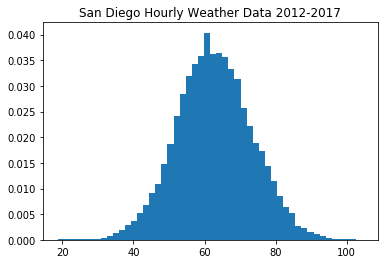

In [14]:
# Filter San Diego Weather Data and Plot The Histogram

temp_sd = temp[['datetime', 'San Diego']]

plt.hist(temp_sd['San Diego'], bins = 50, density=True)
plt.title('San Diego Hourly Weather Data 2012-2017')
plt.show()

In [17]:
# Find the mean and standard deviation of San Diego Weather Data

mean_sd = np.mean(temp_sd['San Diego'])
stdev_sd = np.std(temp_sd['San Diego'])

# Find the mean for Feb 2013
temp_sd_feb13 = temp_sd[temp_sd['datetime'].str.contains('2013-02')]
mean_sd_feb13 = np.mean(temp_sd_feb13['San Diego'])


In [18]:
# Calculate 90% Confidence interval for Feb 2013 using z-statistic, assuming the standard deviation from the whole data

z_s = norm.ppf(0.95) # 90% Confidence interval leaves 5% probability on the tails

upper_bound_z = mean_sd_feb13 + z_s * stdev_sd / np.sqrt(len(temp_sd_feb13))
lower_bound_z = mean_sd_feb13 - z_s * stdev_sd / np.sqrt(len(temp_sd_feb13))

print(upper_bound_z)
print(lower_bound_z)


54.44721582437865
53.1018046220536


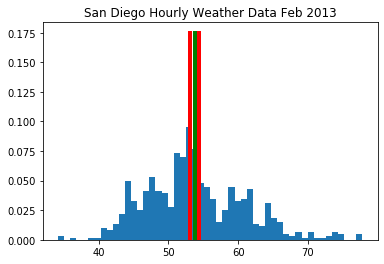

In [19]:
# Plot the Histogram of Feb 2013 data, with upper and lower bounds

plt.hist(temp_sd_feb13['San Diego'], bins = 50, density=True)
plt.title('San Diego Hourly Weather Data Feb 2013')
plt.plot([mean_sd_feb13,mean_sd_feb13],[0, 0.175], 'k-', lw=4, color='green')
plt.plot([upper_bound_z,upper_bound_z],[0, 0.175], 'k-', lw=4, color='red')
plt.plot([lower_bound_z,lower_bound_z],[0, 0.175], 'k-', lw=4, color='red')
plt.show()

# Hypothesis Testing

In [20]:
temp['date_timestamp'] = pd.to_datetime(temp['datetime'])
temp['month'] = temp['date_timestamp'].apply(lambda x: x.month)
temp_march = temp[temp['month'] == 3]

Let's compare march average temperatures of San Diego and Jerusalem. Our null hypothesis is they are equal. So:

$H_0$: $T_{San Diego}$ - $T_{Jerusalem}$ = 0

$H_1$: $T_{San Diego}$ - $T_{Jerusalem}$ $\neq$ 0

In [21]:
x_sd = np.mean(temp_march['San Diego'])
x_jr = np.mean(temp_march['Jerusalem'])
print(f'San Diego Avg: {x_sd}, Jerusalem Avg: {x_jr}')

San Diego Avg: 58.941351992768965, Jerusalem Avg: 61.315491580177834


In [22]:
# using all years' data try to estimate population std

std_sd = np.std(temp['San Diego'])
std_jr = np.std(temp['Jerusalem'])
print(f'San Diego St Dev: {std_sd}, Jerusalem St Dev: {std_jr}')

San Diego St Dev: 10.601868752494303, Jerusalem St Dev: 12.768305151076078


In [24]:
# Using z-statistic and assuming standard deviations we estimated are population standard deviations
z = ((x_sd - x_jr) - (0 - 0)) / np.sqrt(std_sd**2/len(temp_march) + std_jr**2/len(temp_march))
print(f'z statistic: {z}')

z statistic: -8.725145937662406


In [25]:
norm.cdf(z)

# p-value is really small, strong evidence against null. We would reject null hypothesis even with 99% confidence level.

1.3291878967126703e-18

In [26]:
# What if we had the same x_sd and x_jr but less number of samples 
# Using z-statistic and assuming standard deviations we estimated are population standard deviations
no_samples = 10

z = ((x_sd - x_jr) - (0 - 0)) / np.sqrt(std_sd**2/no_samples + std_jr**2/no_samples)
print(f'z statistic: {z}')
print(f'p-value: {norm.cdf(z)}')

# This p-value would not be enough to reject the null hypthesis under 99% confidence level.

z statistic: -0.4523777433414659
p-value: 0.32549843896416086


# Try it yourself

Consider the weather data that we used before. This time we will focus on Philadelphia and New York weather data. Similar to what we did before, we will again convert Kelvin to Fahrenheit. Assuming we are in March 2017, we will try to understand if the temperatures of this month are within known limits.

a- Filter March temperature records from all years, using all the data from all March records, calculate the mean and standard deviation. Do this separately for Philadelphia and New York. Later we will use these parameters as population parameters.

b- Filter the data for March 2017. Using this data calculate the sample means for Philadelphia and New York. We will use these sample means as our observations. Using these observations provide 99% confidence intervals for the true mean. Do this separately for Philadelphia and New York. We already know the true means from part a. Do the true means lie within the intervals?

c- Based on our prior knowledge we assert that March average temperatures for Philadelphia and New York are the same. Based on March 2017 temperature recordings we would like to test our prior knowledge. Conduct this test using hypothesis testing, please state your hypotheses as well. For population standard deviations use the standard deviations that you found in part a.

d- Repeat part c but this time assume that your sample sizes are 10. This means we have the same average March 2017 temperatures as part c. We will again use the population standard deviation from part a. However, we will use a different sample size this time.